In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def load_and_prepare_data(filename, header=False):
    res = pd.read_excel('../data/1Artembev_PhC_sport_and_tripms.xls', header=header)
    res = res[['Physiological Cost (PhC)', 'TRIMP1', 'TRIMP2', 'TRIMP3', 'TRIMP4', 'day number']]
    return res[11::]

In [3]:
artembev = load_and_prepare_data('../data/1Artembev_PhC_sport_and_tripms.xls', header=0)
artembev.head()

,Physiological Cost (PhC),TRIMP1,TRIMP2,TRIMP3,TRIMP4,day number
11,0.411155,802.127,138.638,1.23169,0,1.0
12,0.395014,1450.13,100.318,1341.57,579.98,2.0
13,0.392351,732.626,70.6103,2440.17,1695.58,3.0
14,NaN,809.691,13.2364,1778.61,880.455,4.0
15,0.408444,769.12,26.4721,1773.54,887.856,5.0


### по одному дню 

In [15]:
data = artembev.copy()
train = data.drop(columns=['day number'])
train.dropna(how='all', inplace=True)
train['PhC'] = train['Physiological Cost (PhC)'][1::].tolist() + [np.nan]
# train.drop(columns=['Physiological Cost (PhC)'], inplace=True)
train['day number'] = data['day number']
train.head()

,Physiological Cost (PhC),TRIMP1,TRIMP2,TRIMP3,TRIMP4,PhC,day number
11,0.411155,802.127,138.638,1.23169,0,0.395014,1.0
12,0.395014,1450.13,100.318,1341.57,579.98,0.392351,2.0
13,0.392351,732.626,70.6103,2440.17,1695.58,NaN,3.0
14,NaN,809.691,13.2364,1778.61,880.455,0.408444,4.0
15,0.408444,769.12,26.4721,1773.54,887.856,NaN,5.0


In [16]:
train.dropna(inplace=True)

In [17]:
y = train['PhC']
X = train.drop(columns=['PhC', 'day number'])

In [18]:
def train_and_test(X, y, max_depth=None, draw=False):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    X_train, X_test, y_train, y_test = X[:70], X[70:], y[:70], y[70:]
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree = tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = np.mean(np.abs(y_test - y_pred))
    if draw:
        print(f'R^2 = {r2}')
        print(f'MAE = {mae}')
        plt.figure(figsize=(7,7))
        sns.scatterplot(y_test, y_pred)
    return r2, mae

In [19]:
r_scores = []
depths = []
for i in range(1, 100):
    depths.append(i)
    r_scores.append(train_and_test(X, y, i)[0])
plt.figure(figsize=(14, 7))    
sns.lineplot(depths, r_scores)

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

In [ ]:
plt.figure(figsize=(14, 7))    
sns.lineplot(depths[:4], r_scores[:4])
sns.lineplot([0,4], [0,0])

In [20]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [21]:
def train_and_test_any(X, y, model, draw=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
#     X_train, X_test, y_train, y_test = X[:70], X[70:], y[:70], y[70:]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = np.mean(np.abs(y_test - y_pred))
    if draw:
        print(f'R^2 = {r2}')
        print(f'MAE = {mae}')
        print(model.coef_)
        plt.figure(figsize=(7,7))
        sns.scatterplot(y_test, y_pred)
    return r2, mae

R^2 = -0.4423928284574623
MAE = 0.02634118596054367
[ 3.41495051e-01  1.35551878e-05 -2.33175212e-05 -2.07383386e-06
  5.53864452e-06]


(-0.4423928284574623, 0.02634118596054367)

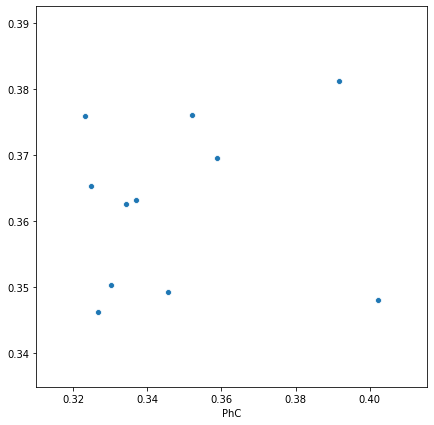

In [22]:
train_and_test_any(X, y, LinearRegression(), draw=True)  
# откуда 0.69 р-квадрат? на том же датасете и той же бибилиотеке было не более 0.5
# изучить, в т.ч. репозиторий

### Среднее за 3 дня

In [10]:
data = artembev.copy()
train = data.drop(columns=['day number', ])
for i, row in data.iterrows():
    data.loc[i, 'PhC mean'] = data.loc[i-2:i, 'Physiological Cost (PhC)'].mean()
train.dropna(how='all', inplace=True)
# train['PhC'] = train['Physiological Cost (PhC)'][1::].tolist() + [np.nan]
# train.drop(columns=['Physiological Cost (PhC)'], inplace=True)
train['day number'] = data['day number']
train['PhC mean'] = data['PhC mean']
train.dropna(inplace=True)
train.head()

,Physiological Cost (PhC),TRIMP1,TRIMP2,TRIMP3,TRIMP4,day number,PhC mean
11,0.411155,802.127,138.638,1.23169,0,1.0,0.411155
12,0.395014,1450.13,100.318,1341.57,579.98,2.0,0.403084
13,0.392351,732.626,70.6103,2440.17,1695.58,3.0,0.399507
15,0.408444,769.12,26.4721,1773.54,887.856,5.0,0.400398
17,0.349240,738.895,1.30417,2444.16,1676.64,7.0,0.378842


In [11]:
y = train['PhC mean']
X = train.drop(columns=['PhC mean', 'day number'])

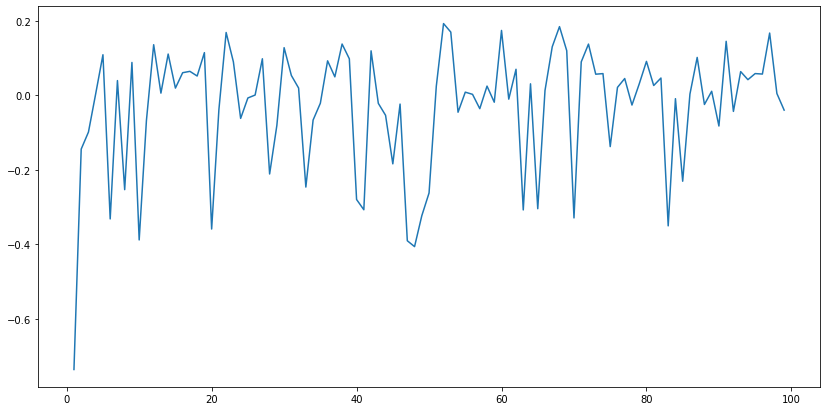

In [12]:
r_scores = []
depths = []
for i in range(1, 100):
    depths.append(i)
    r_scores.append(train_and_test(X, y, i)[0])
plt.figure(figsize=(14, 7))    
sns.lineplot(depths, r_scores)

In [13]:
r_scores = np.asarray(r_scores)
np.asarray(depths)[r_scores.argsort()[::-1]][:10]

array([52, 68, 60, 53, 22, 97, 91, 38, 72, 12])

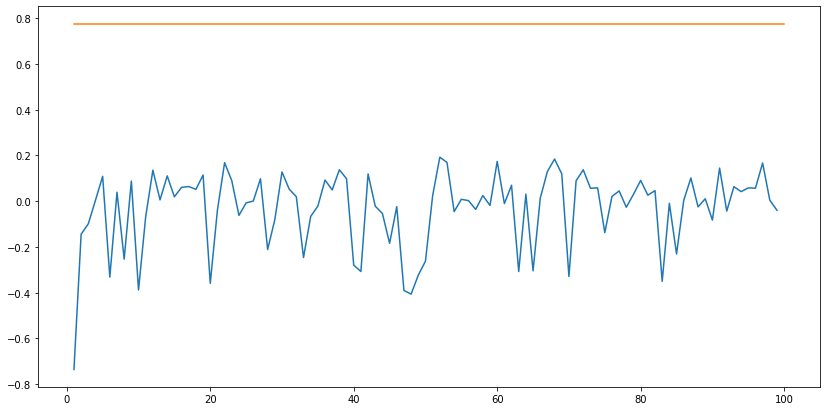

In [14]:
plt.figure(figsize=(14, 7))
sns.lineplot(depths, r_scores)
sns.lineplot([1,100], [0.777,0.777])

R^2 = 0.10871642850323415
MAE = 0.008326537942315996


(0.10871642850323415, 0.008326537942315996)

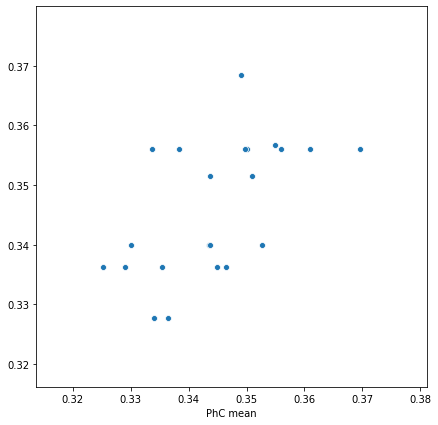

In [15]:
train_and_test(X, y, 5, draw=True)

In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [27]:
def train_and_test_any(X, y, model, draw=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
#     X_train, X_test, y_train, y_test = X[:70], X[70:], y[:70], y[70:]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = np.mean(np.abs(y_test - y_pred))
    if draw:
        print(f'R^2 = {r2}')
        print(f'MAE = {mae}')
        plt.figure(figsize=(7,7))
        sns.scatterplot(y_test, y_pred)
    return r2, mae

R^2 = 0.6955442830638487
MAE = 0.01063572810127275


(0.6955442830638487, 0.01063572810127275)

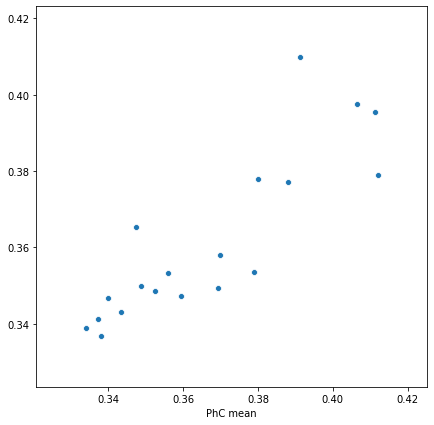

In [28]:
train_and_test_any(X, y, LinearRegression(), draw=True)  
# откуда 0.69 р-квадрат? на том же датасете и той же бибилиотеке было не более 0.5
# изучить, в т.ч. репозиторий

R^2 = 0.22077454302653
MAE = 0.01794680467136479


(0.22077454302653, 0.01794680467136479)

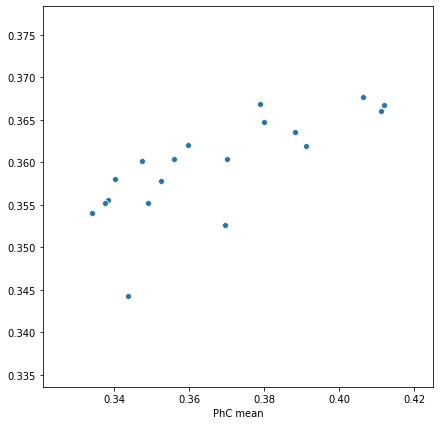

In [23]:
train_and_test_any(X, y, Lasso(), draw=True)

R^2 = 0.36778943910938156
MAE = 0.016599685838776985


(0.36778943910938156, 0.016599685838776985)

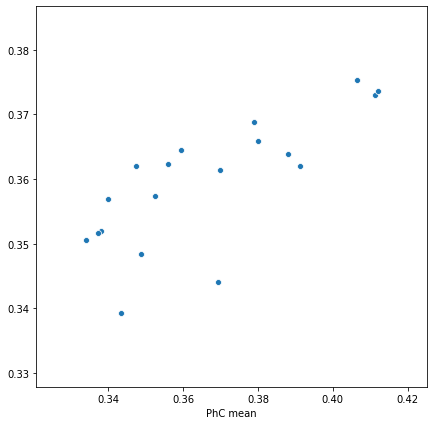

In [24]:
train_and_test_any(X, y, Ridge(), draw=True)

Сейчас мы прогнозируем настоящее и прошлое, оно уже учтено в тримпах 

Надо попробовать прогнозировать только завтрашний день или 3 дня вперед